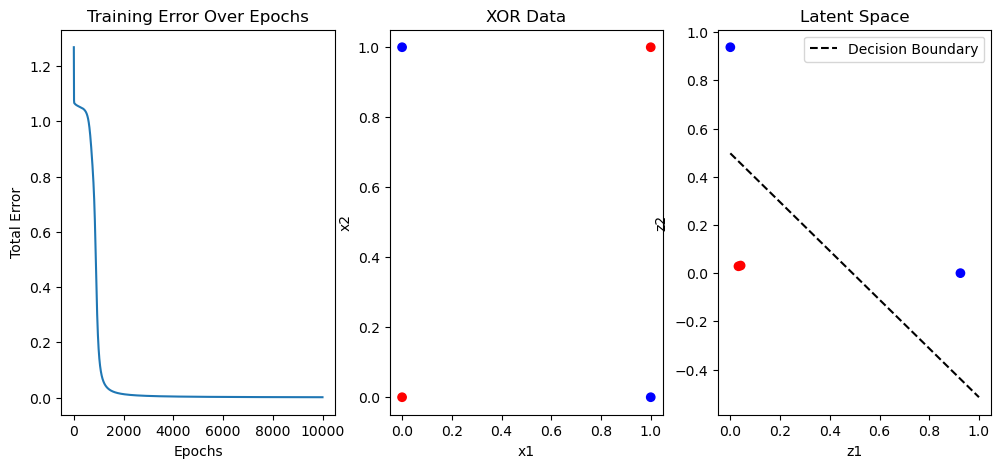

Testing XOR MLP:
Input: (0, 0), Expected Output:[0]-> Predicted Output: [0.] 
Input: (0, 1), Expected Output:[1]-> Predicted Output: [1.] 
Input: (1, 0), Expected Output:[1]-> Predicted Output: [1.] 
Input: (1, 1), Expected Output:[0]-> Predicted Output: [0.] 


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# XOR input and output pairs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


# Initialize weights and biases randomly
np.random.seed(42)
w11, w12, b1 = np.random.randn(), np.random.randn(), np.random.randn()
w21, w22, b2 = np.random.randn(), np.random.randn(), np.random.randn()
w3, w4, b3 = np.random.randn(), np.random.randn(), np.random.randn()

# Training parameters
learning_rate = 0.5
epochs = 10000
errors = []

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        target = y[i]
        
        # Forward pass
        z1 = sigmoid(w11*x1 + w12*x2 + b1)
        z2 = sigmoid(w21*x1 + w22*x2 + b2)
        y_pred = sigmoid(w3*z1 + w4*z2 + b3)
        
        # Compute error
        error = target - y_pred
        total_error += error**2
        
        # Backpropagation (Gradient Descent Updates)
        delta_y = error * sigmoid_derivative(y_pred)
        delta_z1 = delta_y * w3 * sigmoid_derivative(z1)
        delta_z2 = delta_y * w4 * sigmoid_derivative(z2)
        
        # Update weights and biases
        w3 += learning_rate * delta_y * z1
        w4 += learning_rate * delta_y * z2
        b3 += learning_rate * delta_y
        
        w11 += learning_rate * delta_z1 * x1
        w12 += learning_rate * delta_z1 * x2
        b1 += learning_rate * delta_z1
        
        w21 += learning_rate * delta_z2 * x1
        w22 += learning_rate * delta_z2 * x2
        b2 += learning_rate * delta_z2
    
    errors.append(total_error)

# Plot training error
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Training Error Over Epochs')

# Plot XOR data
plt.subplot(1,3,2)
colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Data')

# Compute latent space and decision boundary
z1_vals, z2_vals = [], []
for i in range(len(X)):
    x1, x2 = X[i]
    z1 = sigmoid(w11*x1 + w12*x2 + b1)
    z2 = sigmoid(w21*x1 + w22*x2 + b2)
    z1_vals.append(z1)
    z2_vals.append(z2)

# Plot latent space
plt.subplot(1,3,3)
plt.scatter(z1_vals, z2_vals, c=colors)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Latent Space')

# Plot decision boundary
z1_range = np.linspace(0,1,100)
z2_range = (-w3*z1_range - b3) / w4
plt.plot(z1_range, z2_range, 'k--', label='Decision Boundary')
plt.legend()
plt.show()

# Test the trained model
print("Testing XOR MLP:")
for i in range(len(X)):
    x1, x2 = X[i]
    yi=y[i]
    z1 = sigmoid(w11*x1 + w12*x2 + b1)
    z2 = sigmoid(w21*x1 + w22*x2 + b2)
    y_pred = sigmoid(w3*z1 + w4*z2 + b3)
    print(f"Input: {x1, x2}, Expected Output:{yi}-> Predicted Output: {y_pred.round()} ")

